In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
from shapely.geometry import Point


In [ ]:
# Load dataset
file_path = 'Real_Estate_Sales.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Preview the dataset
print("Data Preview:")
print(data.head())
print("\nDataset Information:")
print(data.info())


<ipython-input-20-47322d36dd6c>:3: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Data Preview:
   Serial Number  List Year Date Recorded     Town           Address  \
0         220008       2022    01/30/2023  Andover       618 ROUTE 6   
1        2020348       2020    09/13/2021  Ansonia   230 WAKELEE AVE   
2          20002       2020    10/02/2020  Ashford   390 TURNPIKE RD   
3         210317       2021    07/05/2022     Avon   53 COTSWOLD WAY   
4         200212       2020    03/09/2021     Avon  5 CHESTNUT DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        139020.0     232000.0       0.5992   Residential    Single Family   
1        150500.0     325000.0       0.4630    Commercial              NaN   
2        253000.0     430000.0       0.5883   Residential    Single Family   
3        329730.0     805000.0       0.4096   Residential    Single Family   
4        130400.0     179900.0       0.7248   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0          NaN              NaN      

In [ ]:
# Fill numerical columns with zeros
data['Sale Amount'].fillna(0, inplace=True)
data['Assessed Value'].fillna(0, inplace=True)
data['Sales Ratio'].fillna(0, inplace=True)

# Fill categorical columns with 'Unknown'
categorical_columns = ['Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Address']
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Convert 'Date Recorded' to datetime and handle missing values
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'], errors='coerce')
data['Date Recorded'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Drop rows with missing 'Location'
data.dropna(subset=['Location'], inplace=True)

# Validate cleaning
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())




<ipython-input-21-982a7bb930d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sale Amount'].fillna(0, inplace=True)
<ipython-input-21-982a7bb930d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df


Missing Values After Cleaning:
Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Serial Number      List Year                  Date Recorded  \
count   2.981110e+05  298111.000000                         298111   
mean    9.712859e+05    2014.320089  2015-08-02 17:06:53.592252416   
min     2.100000e+01    2001.000000            2001-09-04 00:00:00   
25%     4.011000e+04    2007.000000            2007-12-21 00:00:00   
50%     1.407730e+05    2017.000000            2018-07-20 00:00:00   
75%     2.104480e+05    2021.000000            2022-03-18 00:00:00   
max     1.710011e+09    2022.000000            2023-09-29 00:00:00   
std     1.093442e+07       7.402063                            NaN   

       Assessed Value   Sale Amount   Sales Ratio  
count    2.981110e+05  2.981110e+05  2.981110e+05  
mean     2.868815e+05  4.505105e+05  1.249684e+01  
min      0.000000e+00  0.000000e+00  0.000000e+00  
25%      9.456000e+04  1.600000e+05  4.598000e-01  
50%      1.470900e+05  2.600000e+05  5.656522e-01  
75%      2.373450e+05  4.150000e+05 

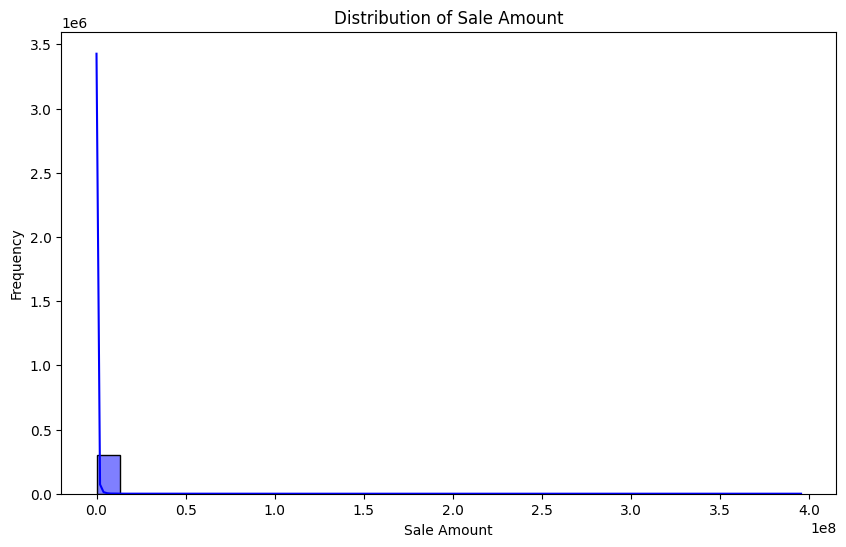

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sale Amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


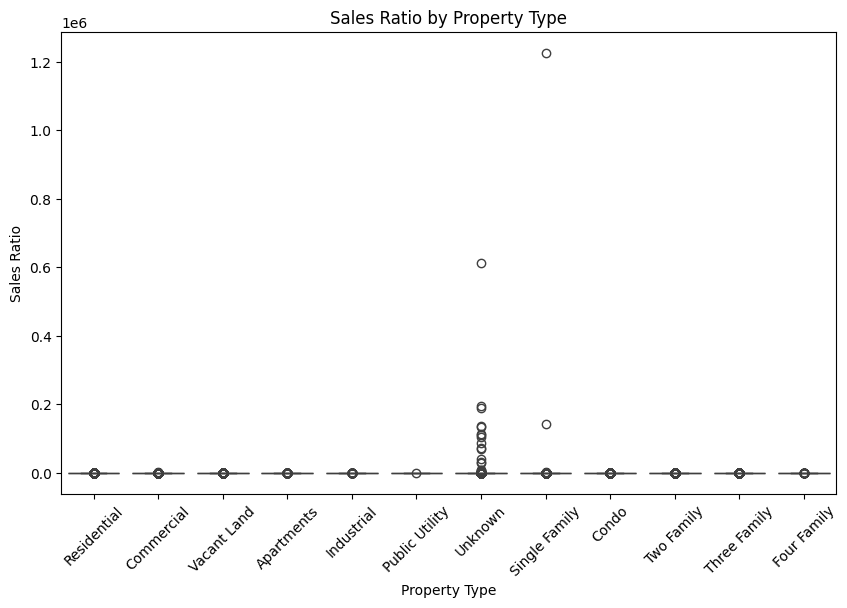

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Property Type', y='Sales Ratio')
plt.title('Sales Ratio by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

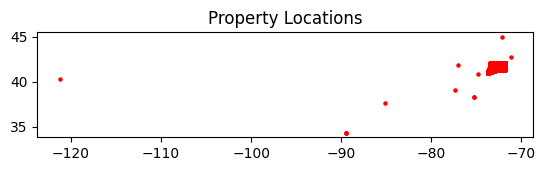

In [ ]:
# Create GeoDataFrame for location visualization
geometry = [Point(xy) for xy in zip(data['Location'].apply(lambda x: float(x.split(' ')[1][1:])),
                                    data['Location'].apply(lambda x: float(x.split(' ')[2][:-1])))]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Plot geographic distribution of properties
plt.figure(figsize=(12, 8))
geo_df.plot(marker='o', color='red', markersize=5)
plt.title('Property Locations')
plt.show()



In [ ]:
# Prepare features and target variable
features = data[['Assessed Value']]
target = data['Sale Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")



Model Performance:
Mean Squared Error (MSE): 2085413302219.56
R-Squared (R²): 0.33


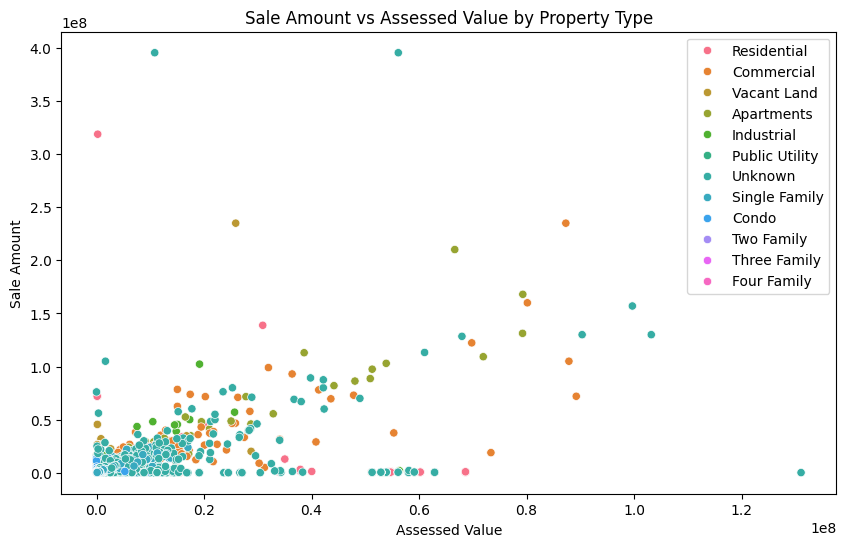

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Assessed Value', y='Sale Amount', hue='Property Type')
plt.title('Sale Amount vs Assessed Value by Property Type')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.legend(loc='best')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point



Property Type Counts:
Property Type
Residential       117788
Unknown            71653
Single Family      70571
Condo              18174
Vacant Land         5781
Commercial          4848
Two Family          4738
Three Family        2419
Apartments          1046
Industrial           684
Four Family          401
Public Utility         8
Name: count, dtype: int64

Average Sale Amount by Property Type:
Property Type
Apartments        3.099410e+06
Industrial        2.267842e+06
Commercial        1.618198e+06
Residential       4.737693e+05
Vacant Land       4.657924e+05
Unknown           4.186073e+05
Single Family     3.843539e+05
Four Family       2.557779e+05
Condo             2.541133e+05
Public Utility    2.227555e+05
Two Family        1.908693e+05
Three Family      1.741109e+05
Name: Sale Amount, dtype: float64


<ipython-input-30-c9f6c2e59189>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sale_by_property.index, y=avg_sale_by_property.values, palette='viridis')


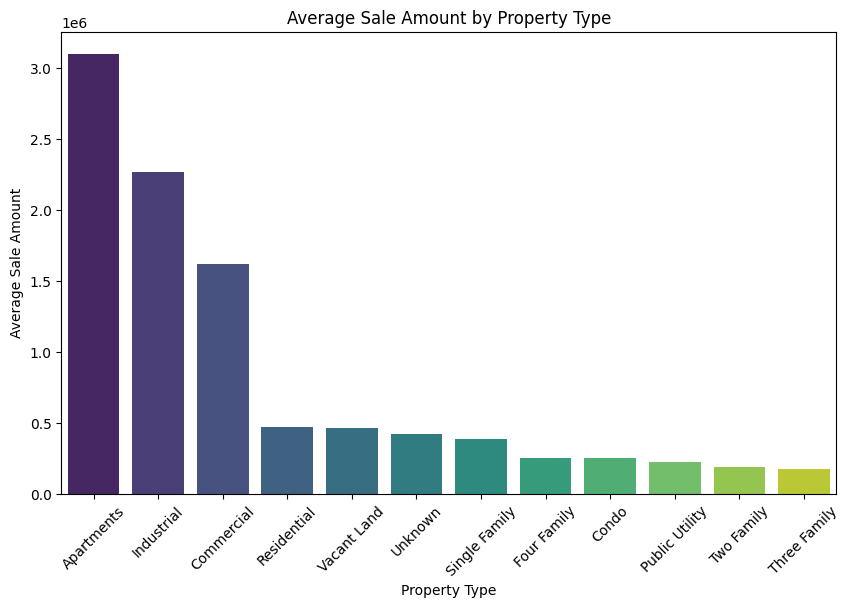

In [ ]:
# Count of each property type
property_counts = data['Property Type'].value_counts()
print("\nProperty Type Counts:")
print(property_counts)

# Average Sale Amount by Property Type
avg_sale_by_property = data.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending=False)
print("\nAverage Sale Amount by Property Type:")
print(avg_sale_by_property)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sale_by_property.index, y=avg_sale_by_property.values, palette='viridis')
plt.title('Average Sale Amount by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-31-891beffd6d2d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price-to-Value Ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero



Price-to-Value Ratio Summary:
count    298073.000000
mean         17.721599
std        1916.362779
min           0.000000
25%           1.384019
50%           1.759454
75%           2.162354
max      469900.000000
Name: Price-to-Value Ratio, dtype: float64

Properties with High Ratios (> 1.5): 201840
Properties with Low Ratios (< 0.5): 10560


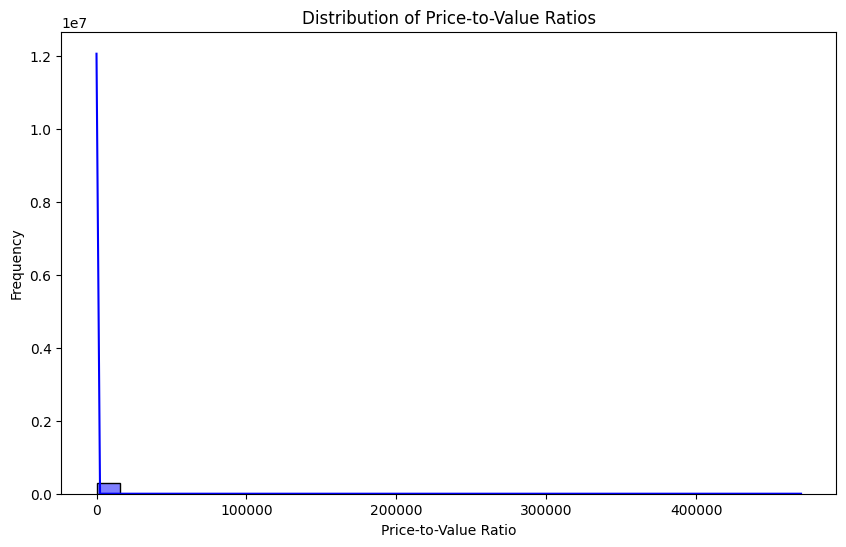

In [ ]:
# Calculate Price-to-Value Ratio
data['Price-to-Value Ratio'] = data['Sale Amount'] / data['Assessed Value']
data['Price-to-Value Ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero

# Summary of Ratios
print("\nPrice-to-Value Ratio Summary:")
print(data['Price-to-Value Ratio'].describe())

# Properties with High and Low Ratios
high_ratio = data[data['Price-to-Value Ratio'] > 1.5]
low_ratio = data[data['Price-to-Value Ratio'] < 0.5]

print(f"\nProperties with High Ratios (> 1.5): {len(high_ratio)}")
print(f"Properties with Low Ratios (< 0.5): {len(low_ratio)}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Price-to-Value Ratio'], kde=True, bins=30, color='blue')
plt.title('Distribution of Price-to-Value Ratios')
plt.xlabel('Price-to-Value Ratio')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x800 with 0 Axes>

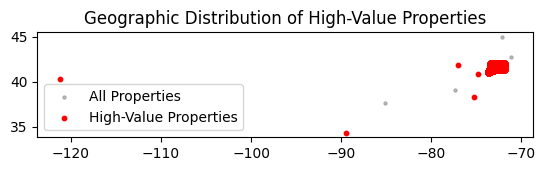

In [ ]:
# Convert Location column to GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Location'].apply(lambda x: float(x.split(' ')[1][1:])),
                                    data['Location'].apply(lambda x: float(x.split(' ')[2][:-1])))]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Plot geographic distribution of high-value properties
high_value = geo_df[geo_df['Sale Amount'] > geo_df['Sale Amount'].quantile(0.75)]

plt.figure(figsize=(12, 8))
base = geo_df.plot(marker='o', color='gray', markersize=5, alpha=0.5, label='All Properties')
high_value.plot(ax=base, marker='o', color='red', markersize=10, label='High-Value Properties')
plt.title('Geographic Distribution of High-Value Properties')
plt.legend()
plt.show()



Monthly Sales Amount:
Month
1     8.953420e+09
2     7.224063e+09
3     9.387579e+09
4     1.025095e+10
5     1.100810e+10
6     1.436500e+10
7     1.389990e+10
8     1.400155e+10
9     1.089038e+10
10    1.116957e+10
11    1.054537e+10
12    1.260625e+10
Name: Sale Amount, dtype: float64


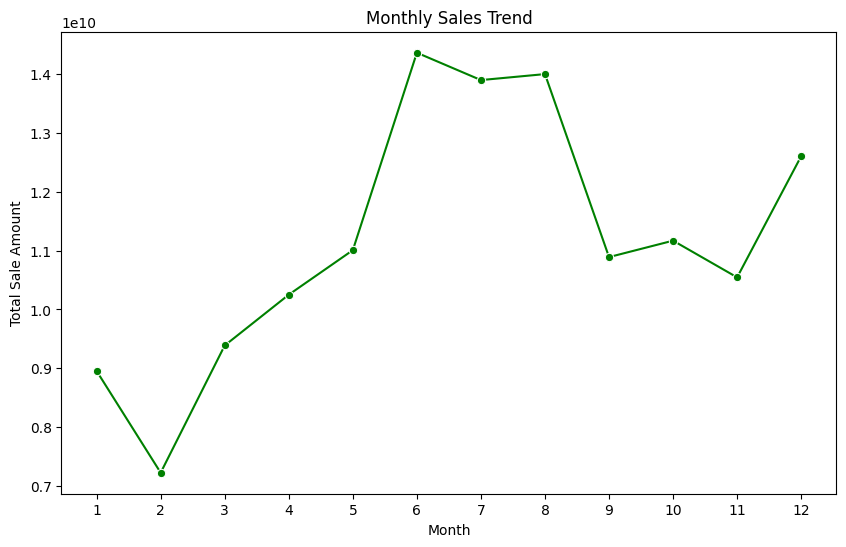

In [ ]:
# Extract Year and Month from Date Recorded
data['Year'] = data['Date Recorded'].dt.year
data['Month'] = data['Date Recorded'].dt.month

# Monthly Sales Trend
monthly_sales = data.groupby('Month')['Sale Amount'].sum()
print("\nMonthly Sales Amount:")
print(monthly_sales)

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sale Amount')
plt.xticks(range(1, 13))
plt.show()



Correlation with Sale Amount:
Sale Amount             1.000000
Assessed Value          0.463876
Year                    0.039285
List Year               0.039201
Month                   0.001878
Serial Number           0.000771
Price-to-Value Ratio    0.000741
Sales Ratio            -0.000946
Name: Sale Amount, dtype: float64


<ipython-input-35-2999e9953359>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sale_amount_corr[1:6].values, y=sale_amount_corr[1:6].index, palette='magma')


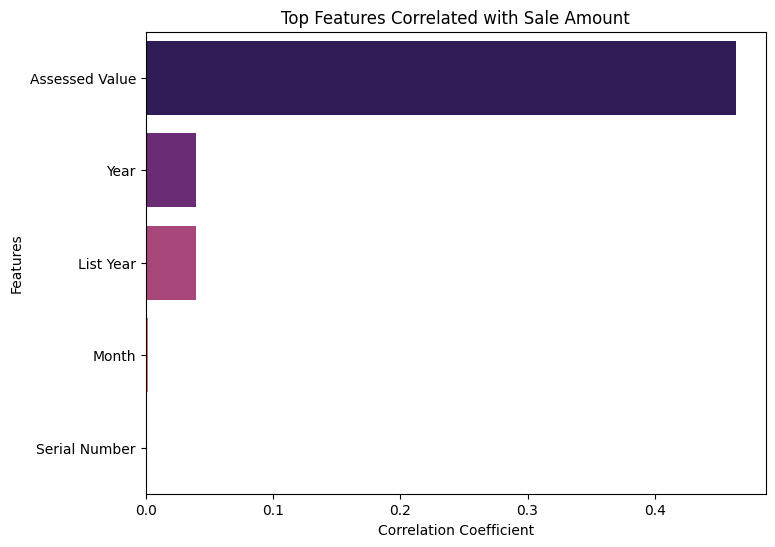

In [ ]:
# Correlation with Sale Amount
# Correlation with Sale Amount
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
correlations = numerical_data.corr()
sale_amount_corr = correlations['Sale Amount'].sort_values(ascending=False)
print("\nCorrelation with Sale Amount:")
print(sale_amount_corr)

# Top Features
plt.figure(figsize=(8, 6))
sns.barplot(x=sale_amount_corr[1:6].values, y=sale_amount_corr[1:6].index, palette='magma')
plt.title('Top Features Correlated with Sale Amount')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

<ipython-input-36-e836490faba3>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Sale Amount'].resample('M').sum()
<ipython-input-36-e836490faba3>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1] + pd.Timedelta(1, unit='D'), periods=12, freq='M')


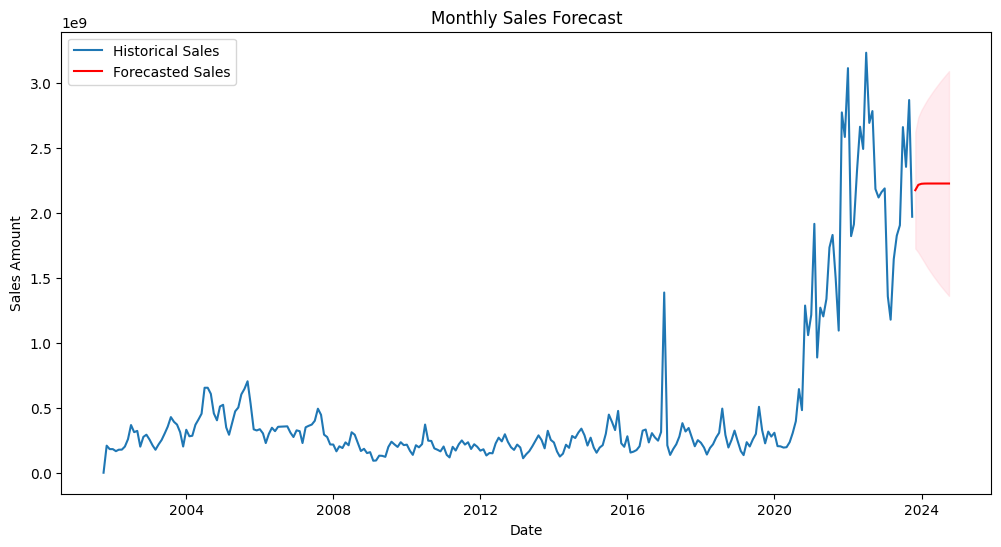

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare monthly sales data
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
data.set_index('Date Recorded', inplace=True)
monthly_sales = data['Sale Amount'].resample('M').sum()

# Train ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # You can tune the (p, d, q) parameters
arima_result = model.fit()

# Forecast next 12 months
forecast = arima_result.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.Timedelta(1, unit='D'), periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.07      0.09       213
           1       0.25      0.14      0.18       984
           2       0.19      0.12      0.15      3552
           3       0.03      0.01      0.02        75
           4       0.06      0.02      0.03       157
           5       0.00      0.00      0.00         3
           6       0.54      0.62      0.58     23403
           7       0.49      0.52      0.50     14236
           8       0.07      0.03      0.04       480
           9       0.09      0.05      0.06       919
          10       0.44      0.41      0.42     14452
          11       0.26      0.18      0.21      1149

    accuracy                           0.48     59623
   macro avg       0.21      0.18      0.19     59623
weighted avg       0.46      0.48      0.47     59623


Confusion Matrix:
[[   14     5     3     1     2     0   106    20     0     0    60     2]
 [    5   135  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


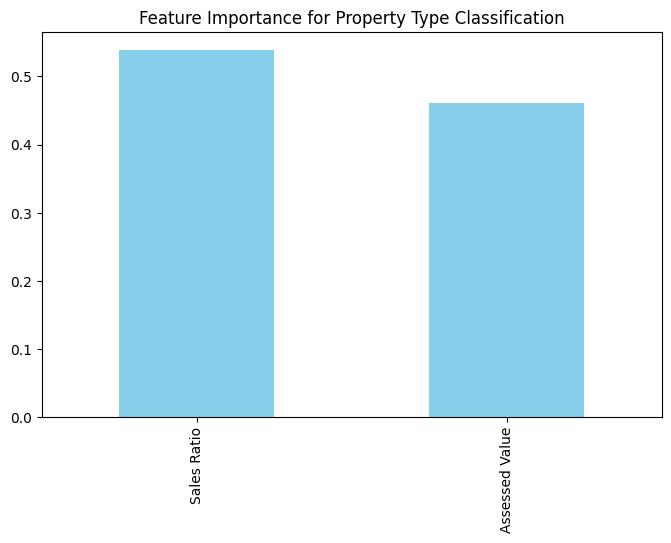

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode categorical target
label_encoder = LabelEncoder()
data['Property Type Encoded'] = label_encoder.fit_transform(data['Property Type'])

# Prepare features and target
X = data[['Assessed Value', 'Sales Ratio']]  # Select relevant numerical features
y = data['Property Type Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Property Type Classification')
plt.show()



Regression Performance:
Mean Squared Error (MSE): 2085376338407.02
R-Squared (R²): 0.33


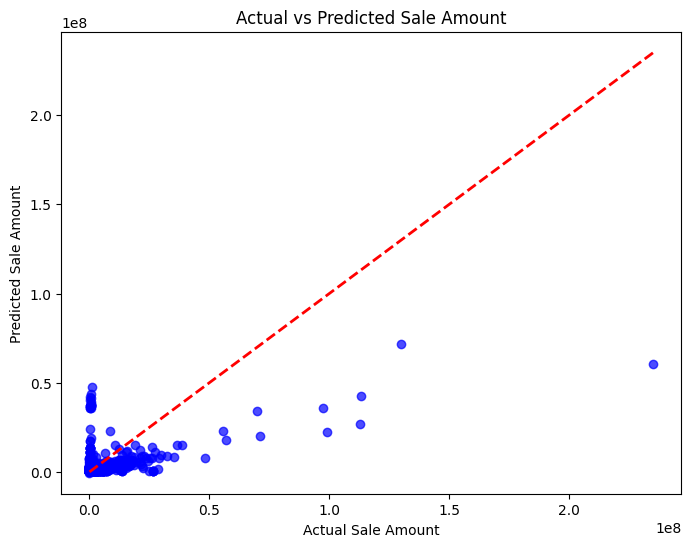

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target
X = data[['Assessed Value', 'Sales Ratio']]  # Add more features if needed
y = data['Sale Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRegression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Sale Amount')
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.show()


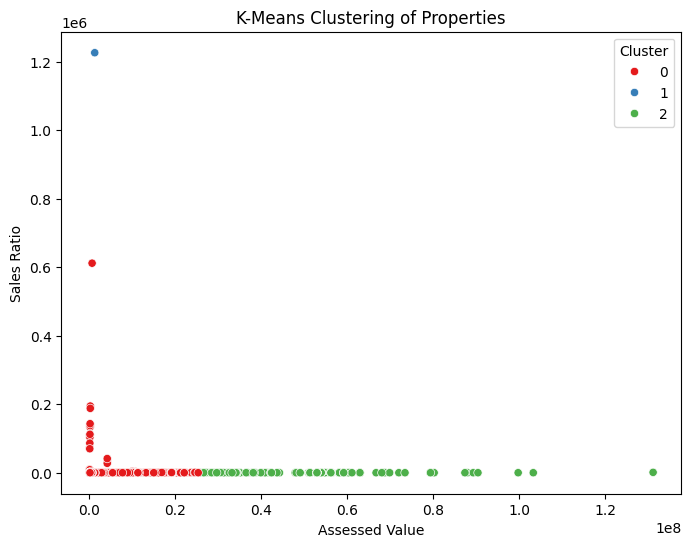

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features for clustering
clustering_features = data[['Assessed Value', 'Sales Ratio']]
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Assessed Value'], y=data['Sales Ratio'], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering of Properties')
plt.xlabel('Assessed Value')
plt.ylabel('Sales Ratio')
plt.show()
